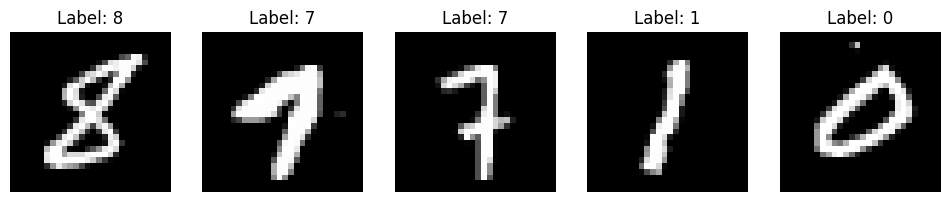

Numeric Representations:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.      

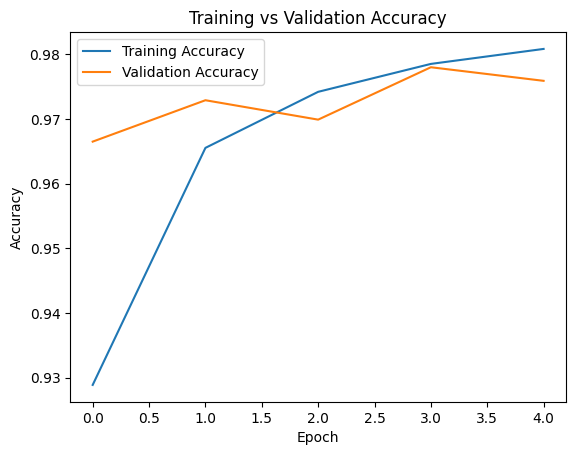

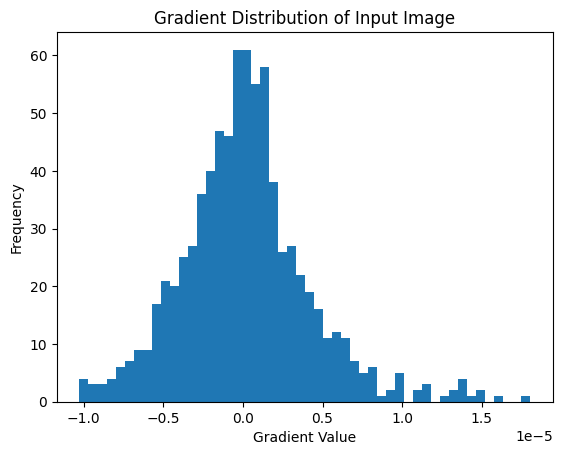

1/1 [==============================] - 0s 90ms/step


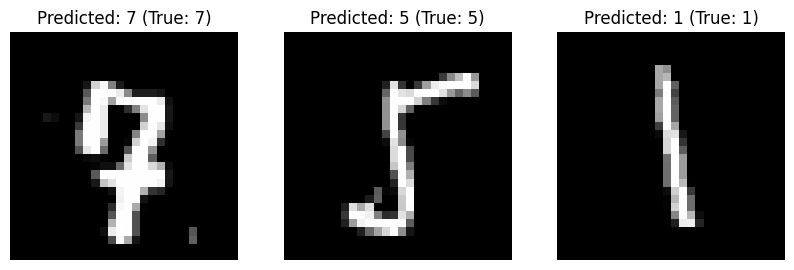

Predicted Labels: [7 5 1]


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

# Load MNIST dataset (handwritten digits 0-9, 28x28 grayscale images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize image pixel values to range [0,1] for efficient training
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

# Display a sample of 5 images along with their numeric representation
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
sample_indices = np.random.randint(0, len(x_train), size=5)
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(f"Label: {y_train[idx]}")
    axes[i].axis('off')
plt.show()

# Print numeric representation of the selected images
print("Numeric Representations:")
for idx in sample_indices:
    print(x_train[idx])  # Display pixel values in array format

# Define a simple feed-forward neural network for digit classification
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 2D images into 1D array (28x28 -> 784)
    Dense(256, activation='relu'),  # First hidden layer with 256 neurons
    Dropout(0.2),  # Dropout layer to reduce overfitting (20% of neurons randomly turned off)
    Dense(128, activation='relu'),  # Second hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network on MNIST dataset
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32, verbose=1)

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Compute gradients for a single image to analyze how the model learns
x_sample = tf.convert_to_tensor(x_train[:1])  # Convert one image to tensor
y_sample = y_train[:1]

with tf.GradientTape() as tape:
    tape.watch(x_sample)  # Watch input image
    predictions = model(x_sample)  # Forward pass through the model
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_sample, predictions)  # Compute loss

# Compute gradients with respect to input image
gradients = tape.gradient(loss, x_sample)  

# Flatten and visualize the gradient distribution
grad_values = gradients.numpy().flatten()
plt.hist(grad_values, bins=50)
plt.xlabel('Gradient Value')
plt.ylabel('Frequency')
plt.title('Gradient Distribution of Input Image')
plt.show()

# Pass random test images to the classifier and display predictions
sample_indices = np.random.randint(0, len(x_test), size=3)
sample_images = x_test[sample_indices]
predictions = np.argmax(model.predict(sample_images), axis=1)

# Display the test images along with predicted labels
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i, idx in enumerate(sample_indices):
    axes[i].imshow(x_test[idx], cmap='gray')
    axes[i].set_title(f"Predicted: {predictions[i]} (True: {y_test[idx]})")
    axes[i].axis('off')
plt.show()

# Print predicted labels for clarity
print("Predicted Labels:", predictions)


In [3]:
model.save('model/mnist_model.h5')